In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

## Big model

First, we'll test the big model trained on 299x299 pictures. 

You can either use your own model, or download the one we trained for the book:

```
wget https://github.com/alexeygrigorev/mlbookcamp-code/releases/download/chapter7-model/xception_v4_large_08_0.894.h5
```

In [4]:
image_size = (299, 299)

In [5]:
model = keras.models.load_model('xception_v4_large_08_0.894.h5')

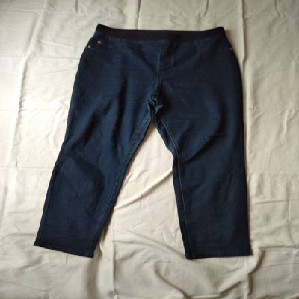

In [6]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(image_size))
img

First, pre-process the image:

In [7]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

And get the prediction:

In [8]:
pred = model.predict(X)
pred[0]

array([-2.8609202, -4.234048 , -1.5732546, -1.907885 , 10.247051 ,
       -2.2489133, -4.297381 ,  4.43905  , -4.4588056, -3.9616938],
      dtype=float32)

To the actual class, we need to see what's the biggest value. We do it by using `argmax`:

In [9]:
pred[0].argmax()

4

To convert it to the label, let's use the `labels` dictionary:

In [10]:
labels[pred[0].argmax()]

'pants'

Now let's apply it to the entire testing dataset

- first, we'll create a generator
- then use the `evaluate` function to get accuracy 

In [11]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 372 images belonging to 10 classes.


In [12]:
model.evaluate(test_ds)

12/12 [==============================] - 83s 7s/step - loss: 0.2493 - accuracy: 0.9032


[0.24929417669773102, 0.9032257795333862]

The model performs even better than in the validation data: 90% on test vs 89% on validation

## Small model

After testing the big model, let's test the small model trained on 150x150 images

Again, you can download a pre-trained model:

```
wget https://github.com/alexeygrigorev/mlbookcamp-code/releases/download/chapter7-model/xception_v3_44_0.853.h5
```

In [13]:
model = keras.models.load_model('xception_v3_44_0.853.h5')

In [14]:
image_size = (150, 150)

In [15]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 372 images belonging to 10 classes.


In [16]:
model.evaluate(test_ds)

12/12 [==============================] - 18s 1s/step - loss: 0.8131 - accuracy: 0.7984


[0.8130767941474915, 0.7983871102333069]

This model performed worse than on validation dataset: 82% vs 85%

It could be due to random fluctuations (the test dataset is not large), but also it could be because the model overfit during training